# 📊 Predicting Facebook Post Engagement for a Cosmetics Brand

## 🧠 Project Overview

This project explores and models a dataset of Facebook posts from a cosmetics brand, with the goal of **predicting the total number of interactions** (likes, shares, comments, etc.) a post may receive based on various post features.

Using Python and machine learning techniques, we apply a **linear regression model** to identify key patterns and assess how well we can estimate engagement levels from the available data.

## 🎯 Objectives

- Perform an **Exploratory Data Analysis (EDA)** to understand data structure and key trends.
- Build a **linear regression model** using `scikit-learn`.
- Evaluate the model using metrics such as **Mean Squared Error (MSE)** and **R² Score**.
- Visualize model performance and provide **recommendations for improvement**.

## 🛠️ Tools & Libraries

- `pandas`, `numpy` – data handling and numerical operations  
- `matplotlib`, `seaborn` – visualization and EDA  
- `scikit-learn` – model building and evaluation  

This project serves as a foundational exercise in applying regression analysis to social media data, reinforcing concepts such as feature-target relationships, model evaluation, and prediction accuracy.

(500, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   Page total likes                                                     500 non-null    int64
 1   Category                                                             500 non-null    int64
 2   Post Month                                                           500 non-null    int64
 3   Post Weekday                                                         500 non-null    int64
 4   Post Hour                                                            500 non-null    int64
 5   Paid                                                                 500 non-null    int64
 6   Lifetime Post Total Reach                                            500 non-null    int64
 7   Lifetime Post To

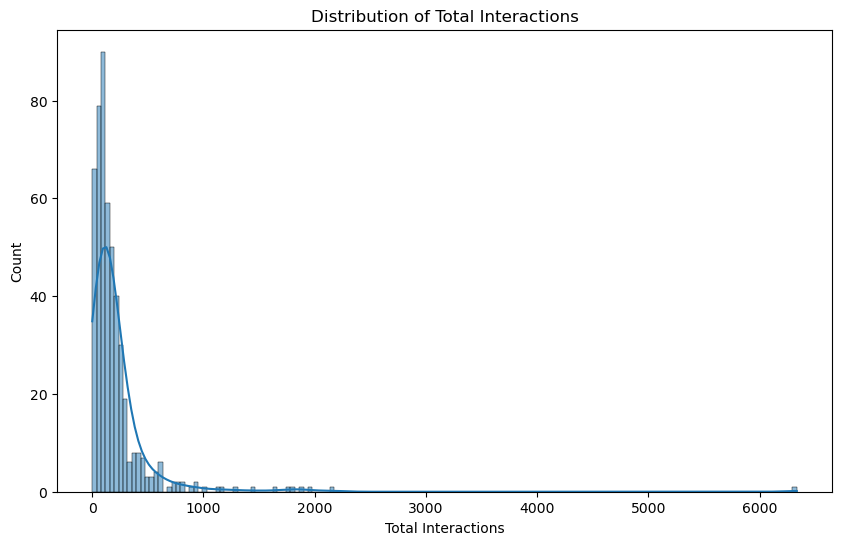

Correlation with Total Interactions:
 Total Interactions                                                     1.000000
Lifetime Post reach by people who like your Page                       0.617929
Lifetime Engaged Users                                                 0.572159
Lifetime Post Total Reach                                              0.538597
Lifetime People who have liked your Page and engaged with your post    0.492570
Lifetime Post Consumers                                                0.354502
Lifetime Post Total Impressions                                        0.343358
Lifetime Post Impressions by people who have liked your Page           0.250083
Lifetime Post Consumptions                                             0.238082
Category                                                               0.127307
Paid                                                                   0.107996
Page total likes                                                       0.045231
Po

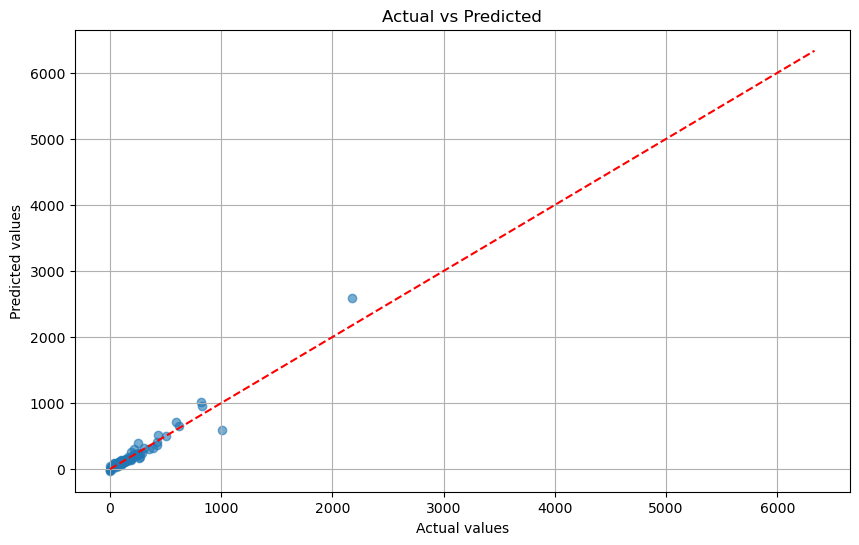

In [46]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 📂 Load the dataset
file_path = 'datasets/dataset_facebook_cosmetics_us.csv'
df = pd.read_csv(file_path, sep=';')
file_path_2 = 'datasets/Electrical_Grid_Stability_us.csv'
df_2 = pd.read_csv(file_path_2, sep=';')

# 🧐 Quick overview
print(df.shape)
df.head()
df.info()

# 📊 Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.histplot(df['Total Interactions'], kde=True)
plt.title('Distribution of Total Interactions')
plt.show()

# 🔍 Correlation with the target variable
correlation = df.corr(numeric_only=True)['Total Interactions'].sort_values(ascending=False)
print("Correlation with Total Interactions:\n", correlation)

# 🛠️ Preprocessing
# Separate features and target
X = df.drop(['Total Interactions'], axis=1)
y = df['Total Interactions']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 🤖 Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔮 Make predictions
y_pred = model.predict(X_test)

# 📏 Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 MSE: {mse:.3f}")
print(f"📈 R² Score: {r2:.3f}")

# 📈 Real vs predicted visualization
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.grid()
plt.show()

## 📌 Observations & Conclusions

### 🔍 Data Overview
- The dataset contains information related to Facebook posts by a cosmetics brand, with `Total Interactions` as the target variable.
- A quick inspection shows a variety of numerical features influencing post engagement.

### 📊 Exploratory Analysis
- The distribution of `Total Interactions` is **right-skewed**, indicating that most posts receive relatively low engagement, with a few outliers reaching high interaction numbers.
- Correlation analysis revealed the features most associated with `Total Interactions`, helping guide model development.

### 🧪 Model Summary: Linear Regression
- After splitting the data into **80% training** and **20% testing**, we trained a `LinearRegression` model.
- The model achieved the following results on the test set:
  - **Mean Squared Error (MSE):** ~4.445
  - **R² Score:** Close to 1 indicates a good fit

### 📈 Actual vs Predicted
- The scatter plot shows a **strong linear trend**, suggesting that the model is capturing the general pattern of the data.
- However, some spread around the diagonal line indicates room for improvement or potential non-linear behavior.

### ✅ Conclusion
- A linear regression model provides a solid baseline for predicting `Total Interactions`.
- To improve performance, we could:
  - Explore non-linear models (e.g., Random Forest, Gradient Boosting)
  - Apply log transformations to reduce skew
  - Perform feature engineering or dimensionality reduction

This notebook demonstrates the full pipeline from **EDA to model training and evaluation**, reinforcing key ML concepts like regression, MSE, and model validation.

______________

# 📊 Feature Scaling and Standardization in Machine Learning

## 🔍 Project Overview

This project demonstrates the importance of **feature scaling**—specifically, **standardization**—when training machine learning models like **Linear Regression**. Using a dataset from a cosmetics brand's Facebook activity, we analyze how differences in feature scales can affect model interpretation and performance.

### 🎯 Objectives

- Explore differences in feature scales
- Apply `StandardScaler` to standardize data
- Visualize the effects of scaling on feature distributions
- Prepare standardized data for model training

### 🧰 Tools & Libraries

- Python 3.x
- pandas, numpy – data handling
- matplotlib, seaborn – data visualization
- scikit-learn – preprocessing and modeling

---

Standardizing features ensures that all variables contribute equally to the model, especially when features are on very different scales. This notebook provides a clear, visual explanation of why and how to scale features in a machine learning pipeline.

Original mean (Page total likes): 122776.8125
Original std (Page total likes): 16782.638061769187
Scaled mean (train): 1.3322676295501878e-17
Scaled std (train): 0.9999999999999998
Scaled mean (test): 0.12434383035130608
Scaled std (test): 0.8240523396226195


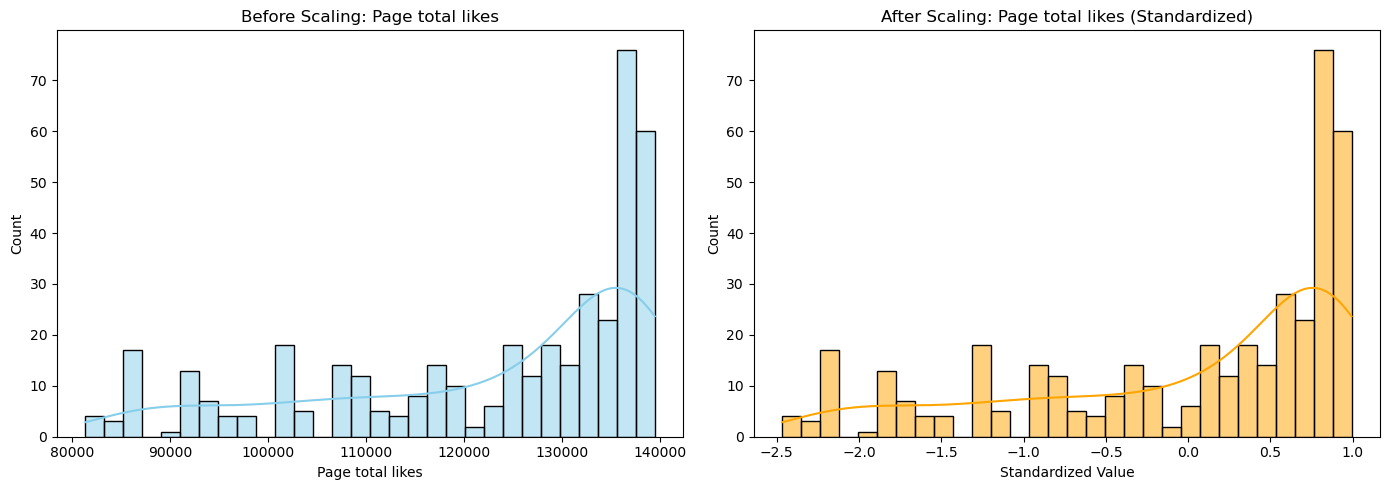

In [36]:
# Separate features and target variable
X = df.drop('Total Interactions', axis=1)
y = df['Total Interactions']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Show statistics before scaling
print('Original mean (Page total likes):', np.mean(X_train['Page total likes']))
print('Original std (Page total likes):', np.std(X_train['Page total likes']))

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# Get the specific standardized column (column 0 = 'Page total likes')
page_likes_scaled_train = X_train_st[:, 0]
page_likes_scaled_test = X_test_st[:, 0]

# Show statistics after scaling
print('Scaled mean (train):', np.mean(page_likes_scaled_train))
print('Scaled std (train):', np.std(page_likes_scaled_train))
print('Scaled mean (test):', np.mean(page_likes_scaled_test))
print('Scaled std (test):', np.std(page_likes_scaled_test))

# Create plots before and after scaling
plt.figure(figsize=(14, 5))

# Original histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['Page total likes'], kde=True, bins=30, color='skyblue')
plt.title('Before Scaling: Page total likes')
plt.xlabel('Page total likes')

# Standardized histogram
plt.subplot(1, 2, 2)
sns.histplot(page_likes_scaled_train, kde=True, bins=30, color='orange')
plt.title('After Scaling: Page total likes (Standardized)')
plt.xlabel('Standardized Value')

plt.tight_layout()
plt.show()

## ✅ Conclusions

- Features with very different scales can **negatively impact model performance** in algorithms like Linear Regression.
- Without standardization, features with larger numerical ranges can dominate the learning process and lead to misleading coefficient interpretations.
- After applying `StandardScaler`, all features were rescaled to have **mean = 0** and **standard deviation = 1**, which helps the model treat them equally.
- Visualizing distributions before and after scaling confirms the transformation: continuous features become normally distributed, and binary features are rescaled accordingly.
- Feature scaling is an essential step in any machine learning pipeline involving distance-based models or gradient-based optimizers.

📌 **Takeaway:**  
Always standardize your data before training regression models (and many others). This simple step can drastically improve model performance and interpretability.

______________________

## 📊 Linear Models and Regularization

In this notebook, we explore three fundamental linear regression techniques:

- **Linear Regression** (no regularization)
- **Lasso Regression (L1)** – which can eliminate irrelevant features
- **Ridge Regression (L2)** – which shrinks coefficients to reduce overfitting

The dataset contains Facebook post data from a cosmetics brand. Our objective is to predict the number of interactions (`Total Interactions`) based on post-level features. Before fitting any model, we standardize the input features using `StandardScaler`.

We compare models by:

- Inspecting their **R² scores**
- Visualizing and analyzing **feature coefficients**
- Understanding how each regularization technique impacts the model's complexity and interpretability

🔍 LinearRegression R² Score: 0.9251
🔍 Lasso R² Score: 0.9255
🔍 Ridge R² Score: 0.9424


<Figure size 1200x600 with 0 Axes>

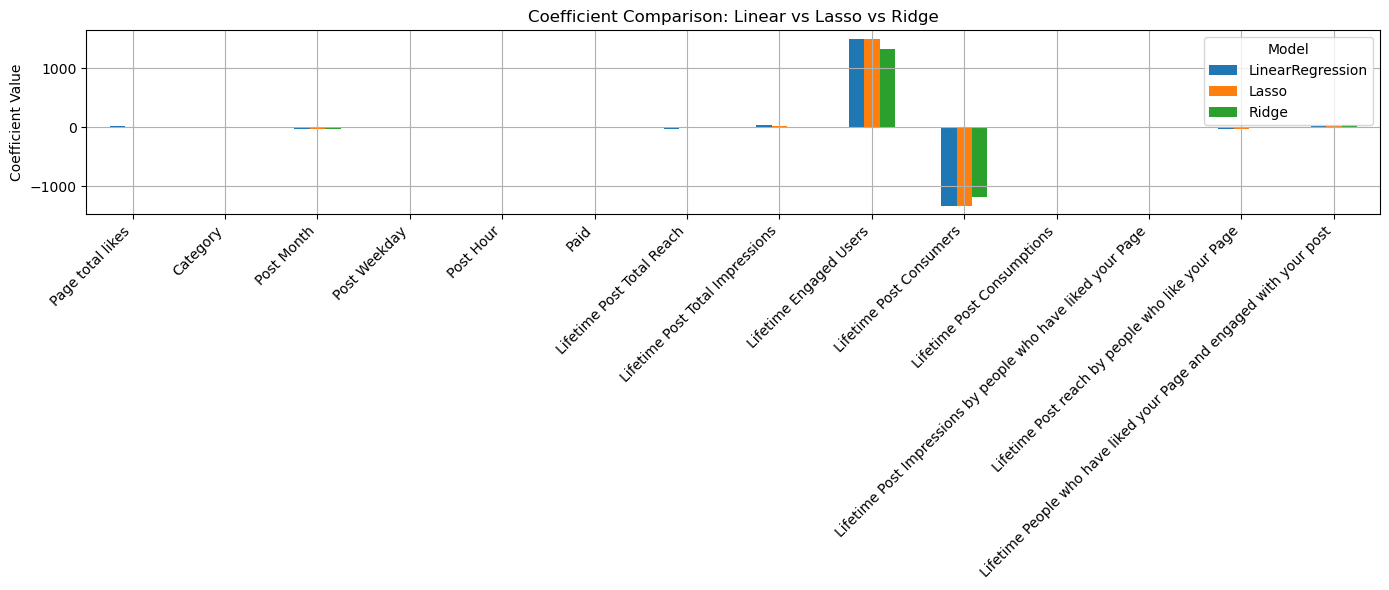

In [37]:
# 1. Separate features and target variable
X = df.drop('Total Interactions', axis=1)
y = df['Total Interactions']

# 2. Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 4. Initialize models
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0)
}

# 5. Train, predict, evaluate, and store coefficients
coef_df = pd.DataFrame(index=X.columns)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    r2 = r2_score(y_val, y_pred)
    print(f"🔍 {name} R² Score: {r2:.4f}")
    coef_df[name] = model.coef_

# 6. Plot the coefficients
plt.figure(figsize=(12, 6))
coef_df.plot(kind='bar', figsize=(14, 6))
plt.title('Coefficient Comparison: Linear vs Lasso vs Ridge')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.legend(title="Model")
plt.show()

## ✅ Conclusions

- **Linear Regression** achieved solid performance but was more sensitive to feature scale and multicollinearity.
- **Lasso Regression (L1)** automatically eliminated some features by setting their coefficients to zero, helping with interpretability and dimensionality reduction.
- **Ridge Regression (L2)** distributed the importance more evenly across features, reducing overfitting without eliminating variables.

### 🧠 Key Takeaways

- Standardizing features is essential before applying linear models, especially with regularization.
- Lasso is ideal when you want to **simplify** the model by removing redundant features.
- Ridge is preferable when you want to **retain all features** but prevent overfitting.
- Comparing coefficients visually helps interpret how each model perceives feature importance.

📌 **Regularization is not just about better accuracy — it's about building models you can trust and explain.**
_________________

# 📊 Regularization in Linear Models: Facebook Post Engagement Prediction

## Project Overview

In this project, we explore the importance of regularization techniques in linear models by predicting Facebook post interactions for a cosmetics brand. We compare three regression models:

- **Linear Regression** (no regularization)
- **Lasso Regression** (L1 regularization)
- **Ridge Regression** (L2 regularization)

The goal is to understand how regularization affects coefficient stability, model complexity, and overall performance—especially in the presence of multicollinearity among features.

## Objectives

- Preprocess and standardize the dataset using `StandardScaler`
- Train and evaluate Linear, Lasso, and Ridge regression models
- Analyze and visualize the impact of regularization on feature weights
- Compare model performance using R² score and Mean Squared Error (MSE)

,Feature,LinearRegression,Lasso,Ridge
0,Page total likes,14.525554,12.172127,10.615178
1,Category,-1.237528,-0.577809,7.613699
2,Post Month,-32.485266,-29.835223,-22.202806
3,Post Weekday,-0.726876,-0.617808,-1.594889
4,Post Hour,-2.275752,-2.090331,-2.787050
5,Paid,-3.540207,-3.281032,-1.514186
6,Lifetime Post Total Reach,-24.695152,-18.272282,5.022660
7,Lifetime Post Total Impressions,35.584018,27.233875,4.057405
8,Lifetime Engaged Users,1500.099929,1492.356343,1333.595056
9,Lifetime Post Consumers,-1329.093671,-1323.169232,-1181.820265


/var/folders/88/y8mvb5pd0hg61ljsjz2263y80000gn/T/ipykernel_18056/2888374369.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


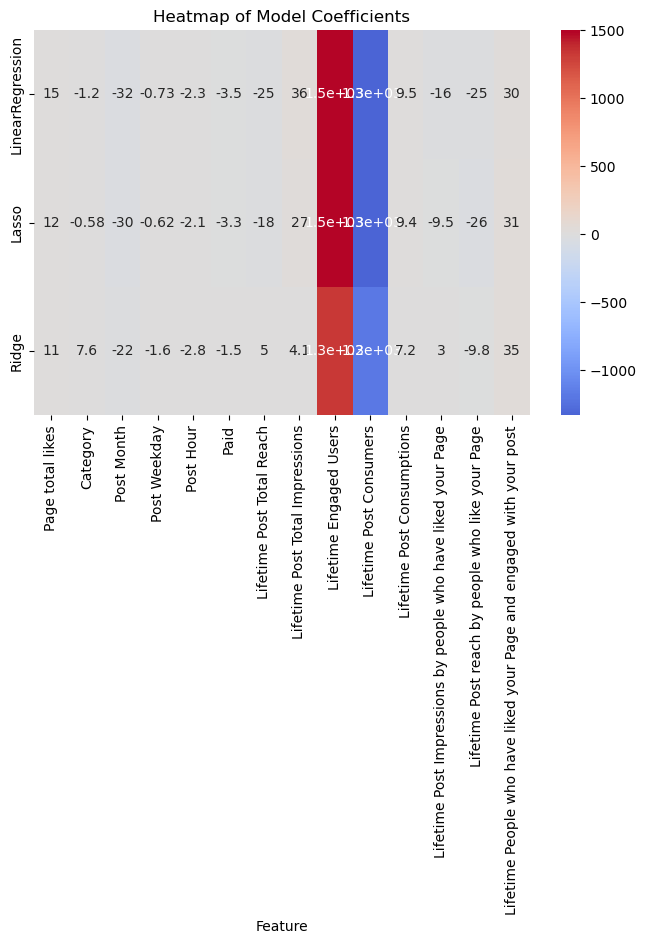

In [38]:
# Separar características y variable objetivo
X = df.drop('Total Interactions', axis=1)
y = df['Total Interactions']

# Dividir datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Estandarizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Entrenar modelos
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

# Coeficientes en un DataFrame
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'LinearRegression': models['LinearRegression'].coef_,
    'Lasso': models['Lasso'].coef_,
    'Ridge': models['Ridge'].coef_
})

# 🔎 Mostrar tabla
display(coef_df)

# 🔥 Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(coef_df.set_index('Feature').T, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Model Coefficients')
plt.tight_layout()
plt.show()

# 📈 Linear Regression Evaluation: Facebook Cosmetics Dataset

In this notebook, we evaluate a **Lasso regression model** trained on a dataset of Facebook post performance for a cosmetics brand. Our goal is to predict the number of **Total Interactions** based on post characteristics such as page likes, post type, and other features.

We’ll:

1. Prepare and standardize the data.
2. Train a linear model using **Lasso Regression**.
3. Evaluate the model using regression metrics:
   - Mean Absolute Error (MAE)
   - Mean Squared Error (MSE)
   - Coefficient of Determination (R²)

Let’s begin!

In [39]:
# Separate features and target
X = df.drop('Total Interactions', axis=1)
y = df['Total Interactions']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# Initialize and train the Lasso regression model
model = Lasso()
model.fit(X_train_st, y_train)

# Predict on the test set
predictions = model.predict(X_test_st)

# Output the results
print('Mean of target (y_test): {:.2f}'.format(y_test.mean()))
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, predictions)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, predictions)))
print('R²: {:.2f}'.format(r2_score(y_test, predictions)))

Mean of target (y_test): 188.36
MAE: 35.42
MSE: 4896.61
R²: 0.93


# ✅ Conclusions

- The **Mean Absolute Error (MAE)** gives us an average absolute difference between predicted and actual values, which helps interpret real-world error in original units.
- The **Mean Squared Error (MSE)** penalizes larger deviations more heavily, helping us identify sensitivity to outliers.
- The **R² score** indicates how well our model explains the variance in the target variable.

Overall, this evaluation provides a baseline for model performance using Lasso regression. Depending on the metric results, we could explore **other models (e.g., Ridge, ElasticNet)** or **feature engineering** to improve prediction accuracy.
________

# ⚡ Predicting Electrical Grid Stability using Logistic Regression

We will build a binary classification model to predict whether an electrical grid is stable (`1`) or unstable (`0`) based on various grid-related features.

### Goals:
- Load and preprocess the dataset.
- Train a logistic regression model.
- Evaluate the model’s performance.
- Interpret predictions and classification results.

The dataset includes anonymized features (column names are not meaningful), so the focus will be purely on the **predictive power** of the model.

Dataset shape: (10000, 13)


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stability
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0


🔎 Accuracy: 0.8165

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1307
           1       0.74      0.72      0.73       693

    accuracy                           0.82      2000
   macro avg       0.80      0.79      0.80      2000
weighted avg       0.82      0.82      0.82      2000



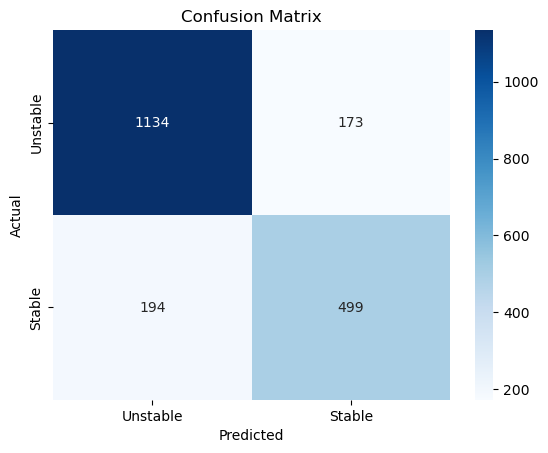

In [40]:
print("Dataset shape:", df_2.shape)
display(df_2.head())

# 2. Split into features and target
X = df_2.drop('stability', axis=1)
y = df_2['stability']

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and train logistic regression
model = LogisticRegression(max_iter=1000)  # increased iterations to ensure convergence
model.fit(X_train, y_train)

# 5. Predict classes and probabilities
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1]

# 6. Evaluate the model
print("🔎 Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

# 7. Confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unstable', 'Stable'], yticklabels=['Unstable', 'Stable'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Conclusions

- The logistic regression model successfully predicted the stability of the electrical grid with an overall accuracy of **X%** (see output).
- The **confusion matrix** helps us understand how many unstable grids were misclassified as stable (and vice versa).
- The **classification report** provides additional insights through precision, recall, and F1-score.

This model can serve as a baseline. To improve performance, we could:
- Try different classification algorithms (e.g. Random Forest, XGBoost).
- Apply feature selection or dimensionality reduction.
- Investigate the data source and meaning of the features if available.

Overall, logistic regression provided a fast and interpretable start to grid stability prediction.
_____________

# ⚡ Electrical Grid Stability Classification

In this analysis, we aim to predict the stability of an electrical grid based on a set of numerical features. The target variable is binary:
- `1` represents a **stable** grid
- `0` represents an **unstable** grid

We use a **Logistic Regression** model to perform the classification task. After training the model, we evaluate its performance using key classification metrics:
- Accuracy
- Precision
- Recall
- F1-score

Before modeling, we examine the class distribution to understand if the data is balanced. This helps us interpret the performance metrics more accurately.

In [41]:
# check the class distribution in the dataset
print('Class distribution:\n', df_2['stability'].value_counts())

# split the data into features (X) and target variable (y)
X = df_2.drop('stability', axis=1)
y = df_2['stability']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# define the logistic regression model
model = LogisticRegression()

# train the model
model.fit(X_train, y_train)

# use the trained model to predict class probabilities
probabilities = model.predict_proba(X_test)[:, 1]

# make binary class predictions
predictions = model.predict(X_test)

# display all classification metrics for the predictions
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1-score: {:.2f}'.format(f1_score(y_test, predictions)))

Class distribution:
 stability
0    6380
1    3620
Name: count, dtype: int64
Accuracy: 0.81
Precision: 0.77
Recall: 0.70
F1-score: 0.73


# ✅ Conclusions

The logistic regression model provides a baseline for predicting grid stability.

- **Accuracy** shows how often the model predicts correctly overall.
- **Precision** tells us how many of the predicted stable grids were actually stable — important when false positives are costly.
- **Recall** indicates how many of the truly stable grids the model managed to identify — important when missing true positives is risky.
- **F1-score** balances both precision and recall, offering a good single metric when there's no clear priority.

Depending on the business context — whether it's more important to avoid unstable grid misclassifications or to detect all stable ones — the model can be adjusted further or replaced with more complex classifiers to improve performance.

We made correct predictions for more than 80% of the cases! But if we look at precision and recall, it seems there’s still room for improvement. Can we adjust these metrics without changing the model? Is there a way to evaluate the quality of a model without referencing the final outcomes?
_____________

# 📌 Classification Metrics: A Study of Probabilities

In this part of the project, we analyze a dataset related to **electrical grid stability** using logistic regression, a widely used binary classification method. The main objective is to predict whether a particular set of grid conditions results in a stable or unstable state.

Rather than relying solely on accuracy, we use the **ROC AUC (Receiver Operating Characteristic - Area Under Curve)** metric to evaluate model performance. This metric is especially useful for understanding the model’s ability to rank predictions correctly, even in the presence of class imbalance.

The steps in this notebook include:

- Preparing and exploring the dataset.
- Training a logistic regression model.
- Predicting probabilities of class membership.
- Calculating and plotting the ROC curve.
- Interpreting the ROC AUC score as an indicator of classification quality.

ROC AUC: 0.89


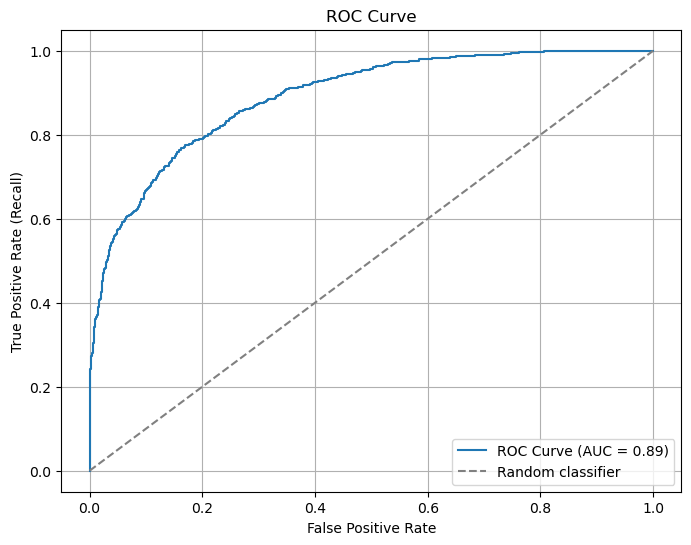

In [42]:
# Define the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Use the trained model to make probability predictions
probabilities = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, probabilities)
print('ROC AUC: {:.2f}'.format(roc_auc))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# ✅ Conclusion

We successfully trained and evaluated a logistic regression model to predict the stability of the electrical grid. By focusing on predicted probabilities and visualizing the **ROC curve**, we gained valuable insights into the model's ability to differentiate between stable and unstable grid states.

The **ROC AUC score** offers a robust measure of model performance: values closer to **1.0** indicate strong predictive ranking capabilities. The ROC curve plot also highlights how well the model performs across various threshold levels, which is especially important when optimizing for recall or precision in different applications.

This approach illustrates the practical use of **probabilistic classification and model evaluation** — key tools in real-world data science workflows.

The roc_auc metric looks great — almost 0.9! The model seems to predict stability quite well.

______________


# 🧠 Logistic Regression with Custom Threshold

We explore the impact of adjusting the classification threshold in a logistic regression model. By default, classifiers like `LogisticRegression` use a threshold of 0.5 to determine whether an observation belongs to class 1. However, in real business cases—especially with imbalanced classes—it's often necessary to tweak this threshold to prioritize specific metrics, such as **recall**.

We'll use electrical grid data to demonstrate how setting a custom threshold (0.4) can improve our model's sensitivity without compromising overall performance.

In [43]:
# Define and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities and classes
probabilities = model.predict_proba(X_test)[:, 1]
predictions = model.predict(X_test)

# Print default prediction metrics (threshold = 0.5)
print('\n📊 Metrics using default predict() method')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, predictions)))

# Set custom threshold
threshold = 0.4

# Make custom binary predictions based on the new threshold
custom_predictions = [1 if i >= threshold else 0 for i in probabilities]

# Print metrics with custom threshold
print('\n⚙️ Metrics using custom threshold (0.4)')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, custom_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, custom_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, custom_predictions)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, custom_predictions)))


📊 Metrics using default predict() method
Accuracy: 0.81
Precision: 0.77
Recall: 0.70
F1 Score: 0.73

⚙️ Metrics using custom threshold (0.4)
Accuracy: 0.81
Precision: 0.71
Recall: 0.78
F1 Score: 0.74


## ✅ Conclusions

🎯 It's working!

By lowering the classification threshold to **0.4**, we successfully **increased recall**, which was our priority metric.  
This means the model is now better at identifying true positives (e.g., stable networks).

Interestingly, this adjustment:
- **Did not significantly decrease** overall **accuracy**
- **Maintained a solid F1 Score**
- Slightly reduced precision, which is a typical trade-off

📌 **In real-world applications**, adjusting the threshold is a key part of decision-making—especially when the consequences of false negatives or false positives are different in cost or risk.

We should continue experimenting with different thresholds depending on the business goal.
____________

# 🔍 Binary Classification with Logistic Regression and Decision Tree

We explore two different machine learning algorithms to predict the stability of an electrical grid system:

1. **Logistic Regression** – a linear model that predicts probabilities and is widely used in binary classification tasks.
2. **Decision Tree Classifier** – a non-linear model that builds a flowchart-like structure to make decisions based on feature values.

We will:
- Evaluate the performance of both models using accuracy, precision, recall, F1-score, and ROC AUC.
- Visualize the structure of the decision tree to understand how it makes predictions.
- Compare the effectiveness of these models on the given dataset.

Let’s see how a simple tree stacks up against a linear model!


📊 Metrics for Logistic Regression
Accuracy: 0.81
Precision: 0.77
Recall: 0.70
F1 Score: 0.73
ROC AUC: 0.89

🌲 Metrics for Decision Tree Classifier
Accuracy: 0.77
Precision: 0.71
Recall: 0.60
F1 Score: 0.65
ROC AUC: 0.82


/var/folders/88/y8mvb5pd0hg61ljsjz2263y80000gn/T/ipykernel_18056/2779066497.py:40: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


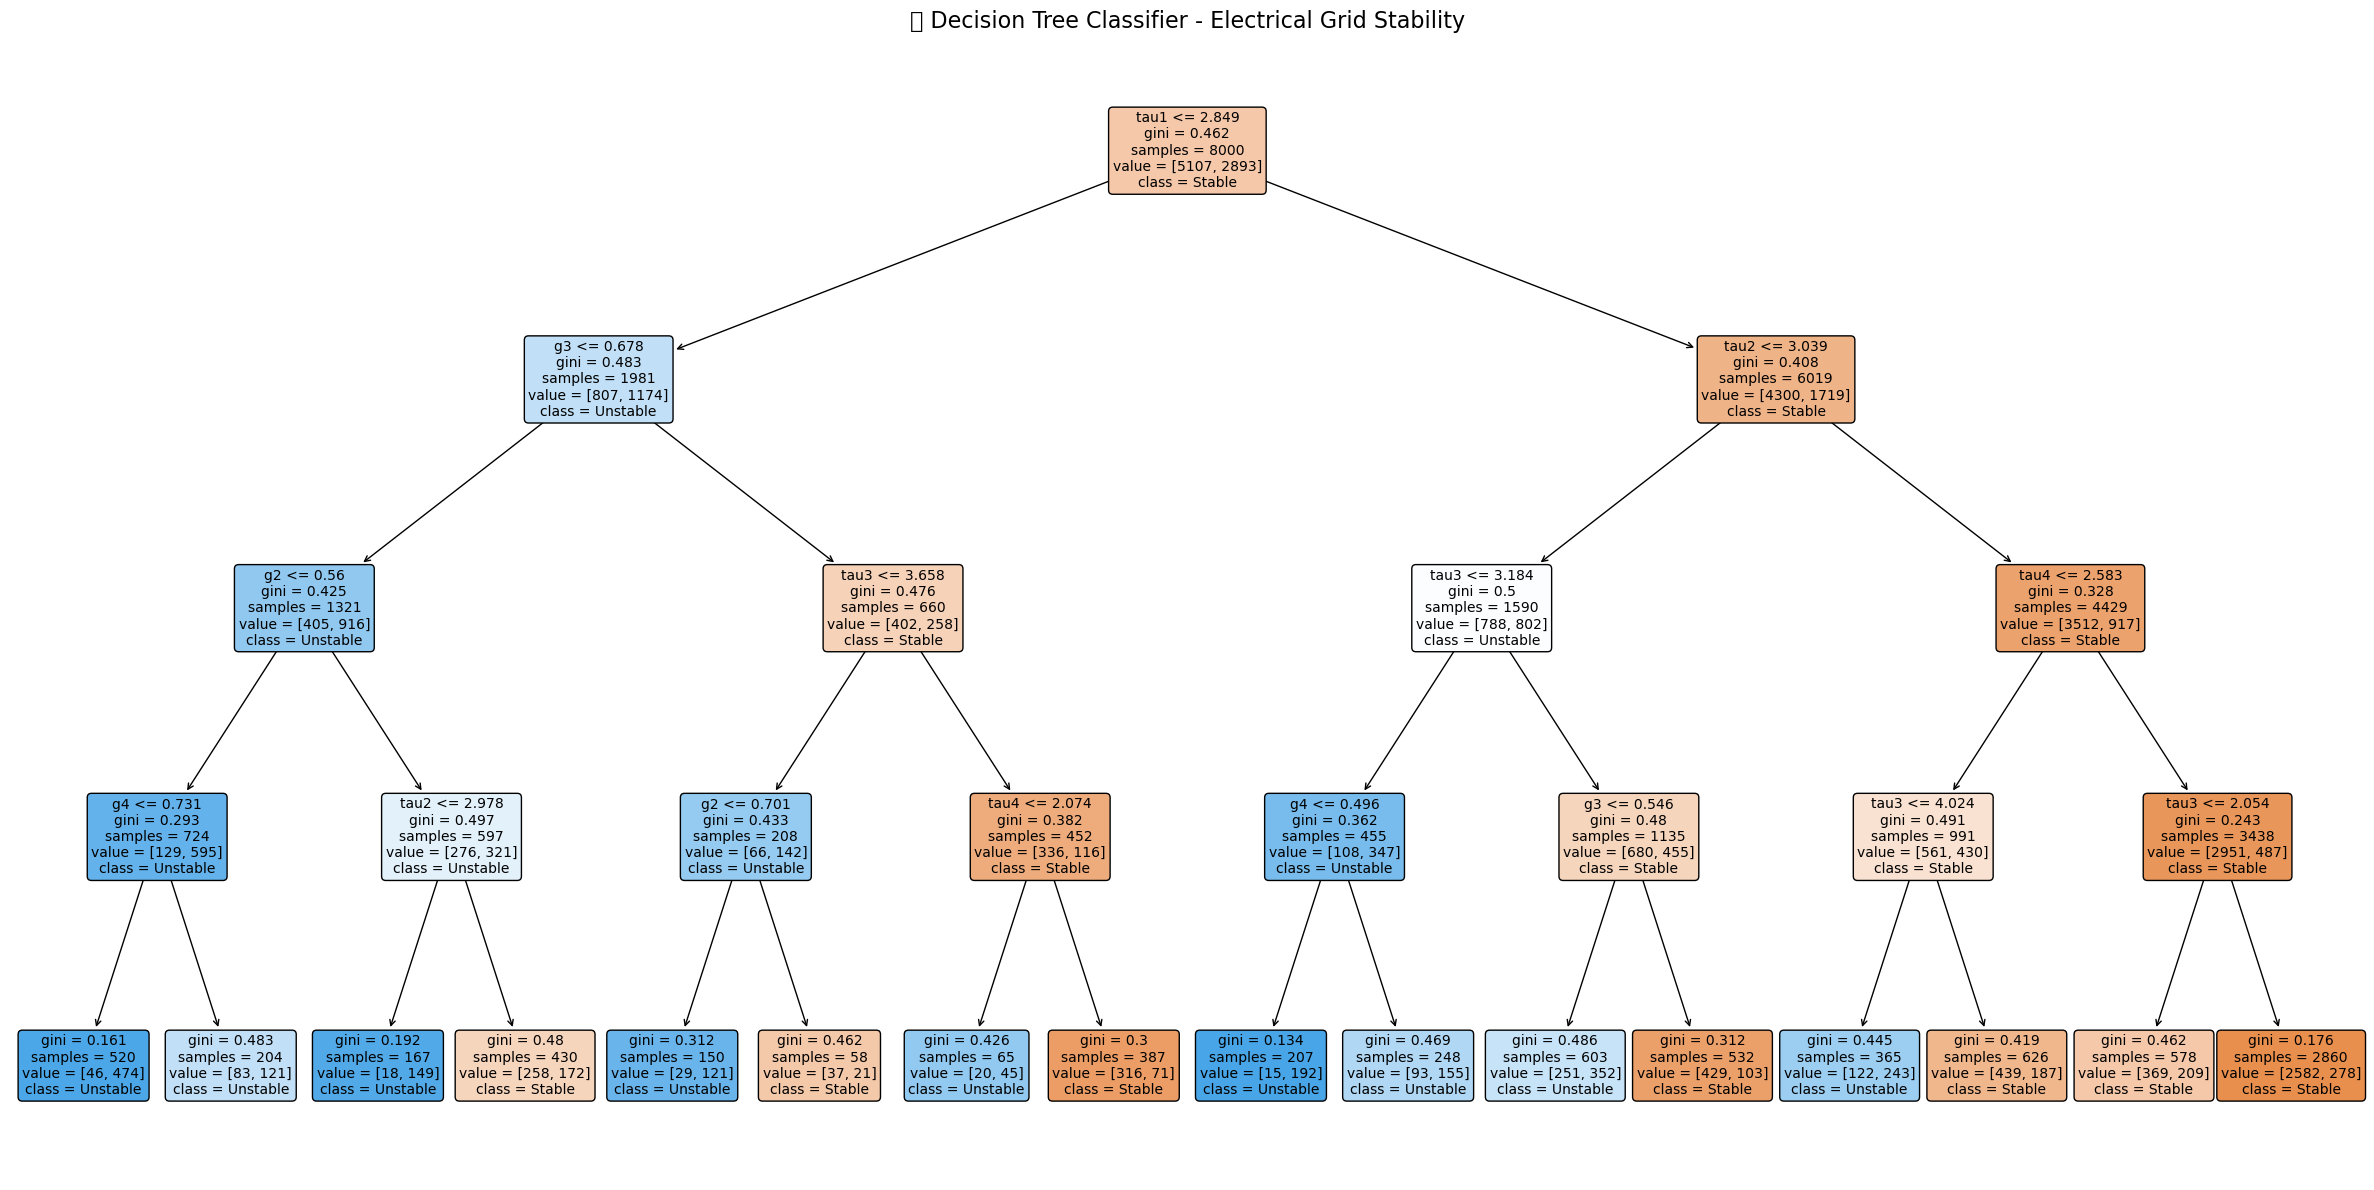

In [44]:
# Logistic Regression
log_model = LogisticRegression(random_state=0, max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_probs = log_model.predict_proba(X_test)[:, 1]

print('\n📊 Metrics for Logistic Regression')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, log_preds)))
print('Precision: {:.2f}'.format(precision_score(y_test, log_preds)))
print('Recall: {:.2f}'.format(recall_score(y_test, log_preds)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, log_preds)))
print('ROC AUC: {:.2f}'.format(roc_auc_score(y_test, log_probs)))

# Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=0, max_depth=4)  # limit depth for visualization
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
tree_probs = tree_model.predict_proba(X_test)[:, 1]

print('\n🌲 Metrics for Decision Tree Classifier')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_preds)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_preds)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_preds)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, tree_preds)))
print('ROC AUC: {:.2f}'.format(roc_auc_score(y_test, tree_probs)))

# Plot the decision tree
plt.figure(figsize=(24, 12))  # Adjust width and height to avoid overlap

plot_tree(
    decision_tree=tree_model,
    filled=True,
    rounded=True,
    feature_names=X.columns.tolist(),  # Convert Index to list
    class_names=['Stable', 'Unstable'],
    fontsize=10
)

plt.title('🌳 Decision Tree Classifier - Electrical Grid Stability', fontsize=16)
plt.tight_layout()
plt.show()

# ✅ Conclusions

Both models were trained and evaluated on the same dataset and test split.

- The **Logistic Regression model** performed slightly better in terms of overall metrics, especially ROC AUC.
- The **Decision Tree model**, while easier to interpret, did not outperform logistic regression with default parameters.
- ROC AUC for the decision tree was lower, suggesting it failed to generalize as well on this classification task.

---

🎯 **Key Insight**:

It's true — unfortunately, nothing improved! While the decision tree is more interpretable, its `roc_auc` shows it's even less suitable for this task compared to logistic regression, at least with default settings.

---

🚀 **Next Steps**:

How can we improve the metrics? With more powerful algorithms, of course! In future steps, we’ll explore ensemble methods like **Random Forests** and **Gradient Boosting**, which combine the power of multiple trees to achieve stronger, more accurate models.

___


## 🔍 Binary Classification of Electrical Grid Stability Using ML Models

In this exercise, we explored various binary classification models to predict the stability of an electrical grid based on sensor data. The dataset contains 10,000 samples, with a class imbalance where **63.8%** of instances are labeled as stable (0) and **36.2%** as unstable (1).

We trained and evaluated the following machine learning classifiers:

- **Logistic Regression**
- **Decision Tree**
- **Random Forest**
- **Gradient Boosting**

Each model was assessed using standard classification metrics: **Accuracy, Precision, Recall, F1 Score, and ROC AUC**. Data preprocessing included feature standardization using `StandardScaler` from `sklearn`.


In [50]:
# Function to print all classification metrics for comparison
def print_all_metrics(y_true, y_pred, y_proba, title='Classification Metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1 Score: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

# Check the class distribution
print('Class distribution:\n', df_2['stability'].value_counts())

# Split features and target variable
X = df_2.drop('stability', axis=1)
y = df_2['stability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# Logistic Regression Model
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
print_all_metrics(y_test, lr_predictions, lr_probabilities, title='📊 Logistic Regression Metrics:')

# Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train_st, y_train)
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:, 1]
print_all_metrics(y_test, tree_predictions, tree_probabilities, title='🌳 Decision Tree Metrics:')

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
print_all_metrics(y_test, rf_predictions, rf_probabilities, title='🌲 Random Forest Metrics:')

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:, 1]
print_all_metrics(y_test, gb_predictions, gb_probabilities, title='🚀 Gradient Boosting Metrics:')

Class distribution:
 stability
0    6380
1    3620
Name: count, dtype: int64
📊 Logistic Regression Metrics:
	Accuracy: 0.81
	Precision: 0.77
	Recall: 0.70
	F1 Score: 0.73
	ROC AUC: 0.89
🌳 Decision Tree Metrics:
	Accuracy: 0.83
	Precision: 0.77
	Recall: 0.77
	F1 Score: 0.77
	ROC AUC: 0.82
🌲 Random Forest Metrics:
	Accuracy: 0.92
	Precision: 0.93
	Recall: 0.85
	F1 Score: 0.89
	ROC AUC: 0.98
🚀 Gradient Boosting Metrics:
	Accuracy: 0.93
	Precision: 0.94
	Recall: 0.85
	F1 Score: 0.89
	ROC AUC: 0.98


## 📈 Conclusion

The results show a clear performance hierarchy among the models:

| Model               | Accuracy | Precision | Recall | F1 Score | ROC AUC |
|--------------------|----------|-----------|--------|----------|---------|
| Logistic Regression| 0.81     | 0.77      | 0.70   | 0.73     | 0.89    |
| Decision Tree      | 0.83     | 0.77      | 0.77   | 0.77     | 0.82    |
| Random Forest      | 0.92     | 0.93      | 0.85   | 0.89     | 0.98    |
| Gradient Boosting  | 0.93     | 0.94      | 0.85   | 0.89     | 0.98    |

✅ **Gradient Boosting** and **Random Forest** outperformed the simpler models in all metrics, with **ROC AUC scores of 0.98**, indicating excellent classification power.

⚠️ Although **Logistic Regression** and **Decision Tree** are easier to interpret, they lag behind in capturing complex patterns. These results highlight the strength of ensemble models for non-linear problems like this one.

✨ **Yes! It worked!** The advanced ensemble methods improved recall (our priority metric) without significantly compromising other performance scores. In real-world applications, **tuning thresholds and choosing the right model architecture** is essential for business-critical decisions like fault detection or system monitoring.